In [6]:
%matplotlib inline #to show th eplots here itself
import pandas as pd
import numpy as np
import matplotlib as plt

df=pd.read_csv('C:\\Users\\Juhi.Agarwal\\Python\\AnalyticsVidhya\\train_u6lujuX_CVtuZ9i.csv')
df.head()

UsageError: unrecognized arguments: #to show th eplots here itself


In [5]:
df.describe()
#implies have missing values in LoanAmount, Loan_Amount_Term,Credit_History in numerical vars
df.count(axis=0)

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [7]:
a=df.median(axis=0)
b=df.mean(axis=0)
c=[[a],[b]]
print(c)
type(a)
b.as_matrix()>a.as_matrix()#mean>median





[[ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64], [ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64]]


array([ True,  True,  True, False, False], dtype=bool)

In [8]:
##2.data cleaning step1
##categorising between numeric and categorical columns
#getting columns 
cols=df.columns
#print(cols)
num_cols = df._get_numeric_data().columns#grtting numeric columns
print(num_cols)
cat_cols=list(set(cols) - set(num_cols))
print(cat_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
['Loan_Status', 'Property_Area', 'Married', 'Dependents', 'Gender', 'Loan_ID', 'Education', 'Self_Employed']


In [9]:
#countCat=[]
df['Gender'].value_counts()
#df.iloc[:,[1,2,3,4,5,10,11,12]]

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
#step:analysis of continuous vars
df['ApplicantIncome'].hist(bins=100) #implies few extreme values

C:\Users\Juhi.Agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


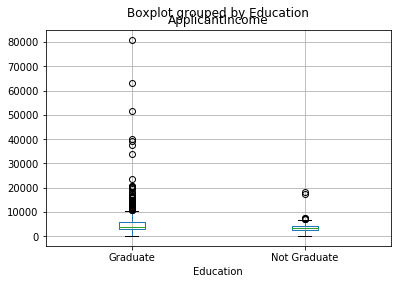

In [5]:
df.boxplot(column='ApplicantIncome', by='Education') 
# we see by education though meadian is almost same but outliers for gradute are high with high income

In [11]:
df['LoanAmount'].hist(bins=50)
df.boxplot('LoanAmount')

In [12]:
#df['CoapplicantIncome'].hist(bins=100)
df.boxplot(column='CoapplicantIncome', by='Education') ##giving error

C:\Users\Juhi.Agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [13]:
df['Loan_Amount_Term'].hist(bins=20)
#df.boxplot(column='Loan_Amount_Term') 

In [14]:
df['Credit_History'].hist(bins=50)
#df.boxplot(column='Credit_History') 

In [15]:
#data manipulation practice
#eg: all females who are nt graduate, but have got a loan
df.loc[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y"),["Gender","Education","Loan_Status"]]


,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [16]:
def missing_num(x):
    return sum(x.isnull())

print("missing values")
print(df.apply(missing_num,axis=0))

missing values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
from scipy.stats import mode
#df['Gender'].fillna('Male')
#df['Married'].fillna("Yes")
#df['Self_Employed'].fillna("No")
##mode(df['Married']).mode[0]
values = {'Gender': 'Male', 'Married': 'Yes', 'Self_Employed': 'No'}
df1=df.fillna(value=values)


In [18]:
#missing value for Loan Amount is replaced according to the means on the basis of "Gender","Married","Self_Employed"
impute_grps=df1.pivot_table(values=["LoanAmount"],index=["Gender","Married","Self_Employed"],aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [19]:
#for loop iterates only through nulls of loanamount
#index1 retrieves only indexes of gender married self_employed combined where nulls for loan amount
for i, row in df1.loc[df["LoanAmount"].isnull(),:].iterrows():
    index1=tuple([row["Gender"],row["Married"],row["Self_Employed"]])
    #print(index1)
    df1.loc[i,"LoanAmount"] = impute_grps.loc[index1].values[0]
    
#checking missing values again  
def missing_num(x):
    return sum(x.isnull())

print("missing values")
print(df1.apply(missing_num,axis=0))
    

missing values
Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [20]:
a=df["Credit_History"]
b=df["Loan_Status"]
ab=pd.crosstab(a,b,margins=True)
#aa=pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)
print(ab)


Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564


In [21]:
def perConvert(ser):
    return ser/float(ser[-1])
#pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(perConvert, axis=1)
ab.apply(perConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [22]:
#defining a dataframe INR per sq meter
prop_rates=pd.DataFrame([1000, 5000, 12000],index=['Rural','Semiurban','Urban'],columns=['rates'])
print(prop_rates)



           rates
Rural       1000
Semiurban   5000
Urban      12000


In [23]:
data_merged = df.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


In [24]:
#for practice
AA1=pd.DataFrame({'RKey':['foo','bazz','boo','abc','eee'],'Value':[1,2,3,4,5]})
AA2=pd.DataFrame({'LKey':['foo','bazz','bbb','abc'],'Value':[2,4,6,8]})
#A.  merge(B, left_on='lkey', right_on='rkey', how='outer')
AA2.merge(AA1, right_on='RKey', left_on='LKey',how='outer')

#AA2.merge(AA1, on='RKey',how='outer')


,LKey,Value_x,RKey,Value_y
0,foo,2.0,foo,1.0
1,bazz,4.0,bazz,2.0
2,bbb,6.0,NaN,NaN
3,abc,8.0,abc,4.0
4,NaN,NaN,boo,3.0
5,NaN,NaN,eee,5.0


In [25]:
#sorting the data
data_sorted = df.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


In [26]:
pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), 3, retbins=True)

([(0.19, 3.367], (0.19, 3.367], (0.19, 3.367], (3.367, 6.533], (6.533, 9.7], (0.19, 3.367]]
 Categories (3, interval[float64]): [(0.19, 3.367] < (3.367, 6.533] < (6.533, 9.7]],
 array([ 0.1905    ,  3.36666667,  6.53333333,  9.7       ]))

In [27]:
def binning(col,cut_points,labels):
    minVal=col.min()
    maxVal=col.max()
    break_points=[minVal]+cut_points+[maxVal]
    if not labels:
        labels=range(len(cut_points)+1)
    
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin
        

cut_points=[90,140,190]
#labels=["low","medium","high","very high"]
labels=[0,1,2,3]
df["LoanAmount_bin"]=binning(df["LoanAmount"],cut_points,labels)
print(pd.value_counts(df["LoanAmount_bin"],sort=False))
#print(df['LoanAmount_bin'])



0    104
1    265
2    132
3     91
Name: LoanAmount_bin, dtype: int64


In [28]:
#Label encoding for categorical char vars
def coding(col,codeDict):
    colCoded=pd.Series(col,copy=True)
    for key,value in codeDict.items():
        colCoded.replace(key,value,inplace=True)
    return colCoded
        

print("Before coding")
print(pd.value_counts(df["Loan_Status"]))
df["Loan_Status_coded"]=coding(df["Loan_Status"],{'Y':1,'N':0})

print("after coding")
print(pd.value_counts(df["Loan_Status_coded"]))



Before coding
Y    422
N    192
Name: Loan_Status, dtype: int64
after coding
1    422
0    192
Name: Loan_Status_coded, dtype: int64


In [29]:
df.dtypes
colTypes = pd.read_csv('C:\\Users\\Juhi.Agarwal\\Downloads\\datatypes.csv')
print(colTypes)


              feature         type
0             Loan_ID  categorical
1              Gender  categorical
2             Married  categorical
3          Dependents  categorical
4           Education  categorical
5       Self_Employed  categorical
6     ApplicantIncome   continuous
7   CoapplicantIncome   continuous
8          LoanAmount   continuous
9    Loan_Amount_Term   continuous
10     Credit_History  categorical
11      Property_Area  categorical
12        Loan_Status  categorical


In [30]:
for i,row in colTypes.iterrows():
    if row['type']=='categorical':
        df[row['feature']]=df[row['feature']].astype(np.object)
    elif row['type']=='continuous':
        df[row['feature']]=df[row['feature']].astype(np.float)
print(df.dtypes)
        

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_bin       category
Loan_Status_coded       int64
dtype: object


In [32]:
df_test=df
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_bin,Loan_Status_coded
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1,Urban,Y,NaN,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,1.0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,0.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,1.0,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,2.0,1


In [33]:
df['Self_Employed'].value_counts()
df['Self_Employed'].fillna('No',inplace=True)

In [35]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [37]:
print(df.apply(lambda x: sum(x.isnull()),axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_bin       22
Loan_Status_coded     0
dtype: int64
